### Data Prep

In [34]:
#importing packages

import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
#reading the dataset and checking output

df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
#Check data type of each column to identify target and fix any discrepancies

df.dtypes
# numeric columns: SeniorCitizen, tenure, MonthlyCharges
# y: Churn

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [37]:
#Removing empty row in "Total Charges" column and reclassifying the rest of the column as float instead of string

df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [38]:
# Generating all possible categories of each column

categorical_col = ['Churn',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']
for str in categorical_col:
    print(df[str].unique())

['No' 'Yes']
['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [39]:
# Dummufing categorical columns by giving integer numbers (Ordinal Encoding)
# Create a dictionary to map category labels to integer values
category_mapping = {}

# Dummify categorical columns using integer labels
for column in categorical_col:
    categories = df[column].unique()
    category_mapping[column] = {category: index for index, category in enumerate(categories)}
    df[column] = df[column].map(category_mapping[column])

print(category_mapping)

# category_mapping2 = {}

# # Dummify categorical columns using integer labels
# for column in categorical_col:
#     categories = df[column].unique()
#     category_mapping2[column] = {category: index for index, category in enumerate(categories)}
#     df[column] = df[column].map(category_mapping2[column])

{'Churn': {'No': 0, 'Yes': 1}, 'gender': {'Female': 0, 'Male': 1}, 'Partner': {'Yes': 0, 'No': 1}, 'Dependents': {'No': 0, 'Yes': 1}, 'PhoneService': {'No': 0, 'Yes': 1}, 'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2}, 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2}, 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 2}, 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}, 'PaperlessBilling': {'Yes': 0, 'No': 1}, 'PaymentMethod': {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}}


In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1


In [41]:
##Check for duplicates in column "customerID" as it's supposed to be unique for each customer

# Check for duplicates in the specified column
duplicates = df.duplicated(subset='customerID', keep=False)
# Get the duplicate rows based on the specified column
duplicate_rows = df[duplicates]
print(duplicate_rows) # we found no duplicate

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [42]:
# Drop "customerID" as it's irrelevant for the analysis

df = df.drop('customerID', axis=1)

In [43]:
#moving target column to be first for simplicity

columns = df.columns.tolist()

columns.insert(0, columns.pop(columns.index('Churn')))

df = df[columns]

In [44]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,0,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,1,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,0,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,1,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65


In [45]:
#Extracting Dependent (target) variable  

y= df['Churn']

#Extracting Independent Variable  

x= df.drop('Churn', axis=1)  

In [46]:
#splitting the dataset into test and train subsets with a 70:30 ratio

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

In [47]:
#Checking if dataset is imbalanced: number of values (in this case, Yes and No) should be roughly identical

# Access the target variable column
target_variable = df['Churn']

# Apply value_counts() to the target variable column
class_counts = target_variable.value_counts()

# Print the class counts
print(class_counts)


0    5163
1    1869
Name: Churn, dtype: int64


In [48]:
#Looks like our dataset is imbalanced (5000 vs 2000). In this case, we can implement oversampling (increasing number of 'Yes's) by utilizing SMOTE (abbreviation for something smart) - not sure how this works.

#pip install imbalanced-learn==0.8.0
#pip install scikit-learn==0.24.2

from imblearn.over_sampling import SMOTE

# Assuming you have separate train and test sets: x_train, y_train, x_test, y_test
# Replace 'x_train', 'y_train', 'x_test', and 'y_test' with your actual variable names

# Instantiate the SMOTE oversampling technique
smote = SMOTE()

# Apply SMOTE only on the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Print the class distribution before and after oversampling
print("Class distribution before SMOTE (Training Data):")
print(y_train.value_counts())
print("Class distribution after SMOTE (Training Data):")
print(y_train_resampled.value_counts())

# Note: The test data remains unchanged
print("Class distribution in Test Data:")
print(y_test.value_counts())

Class distribution before SMOTE (Training Data):
0    3608
1    1314
Name: Churn, dtype: int64
Class distribution after SMOTE (Training Data):
0    3608
1    3608
Name: Churn, dtype: int64
Class distribution in Test Data:
0    1555
1     555
Name: Churn, dtype: int64


In [146]:
#reshape train/test variables into 2-dimensional array with 1 column (for transformation, regression and more)
# x_train= x_train.values.reshape(-1, 1)
# x_test = x_test.values.reshape(-1, 1)

#y_train = y_train.reshape(-1, 1)
#y_test = y_train.reshape(-1, 1)

### Baseline Model - Logistic Regression Model without Feature Selection

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
# Predict on the test set
y_pred = model.predict(x_test)

In [51]:
# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred),4)
print("Accuracy:", accuracy)

Accuracy: 0.7986


### Feature Selection
In this step, we're going to do feature selection using different methods and make decision based on aggregated results in the end. 

##### 1. Correlation analysis

<AxesSubplot:>

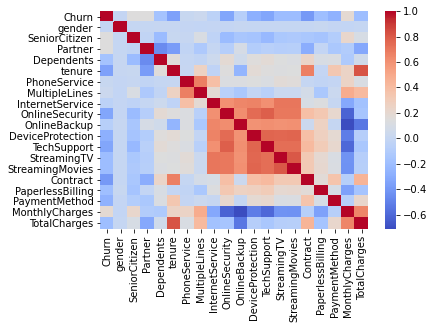

In [150]:
# create visualization for the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

In [151]:
# set threshold at 0.7 - i.e. a pair of variables that has correlation score >= 0.7 or <= -0.7 is considered to be have high correlation. 
threshold = 0.7
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.index[j]
            if colname1 != colname2:
                msg = colname1+' - '+colname2
                high_corr_pairs.append(msg)

high_corr_cols_df = pd.DataFrame({"high_correlation_pairs":high_corr_pairs})
high_corr_cols_df


,high_correlation_pairs
0,DeviceProtection - OnlineSecurity
1,TechSupport - OnlineSecurity
2,TechSupport - DeviceProtection
3,StreamingTV - InternetService
4,StreamingTV - OnlineSecurity
5,StreamingTV - DeviceProtection
6,StreamingTV - TechSupport
7,StreamingMovies - InternetService
8,StreamingMovies - OnlineSecurity
9,StreamingMovies - DeviceProtection


##### 2. Tree-based feature selection

In [152]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model and fit the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dataframe to display feature importances
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the feature importances
print("Feature Importances (Tree-based):")
print(importance_df)

Feature Importances (Tree-based):
             Feature  Importance
0       TotalCharges    0.207812
1     MonthlyCharges    0.179105
2           Contract    0.167822
3             tenure    0.120251
4     OnlineSecurity    0.042987
5      PaymentMethod    0.042083
6    InternetService    0.027776
7             gender    0.027619
8   PaperlessBilling    0.023794
9      MultipleLines    0.023748
10     SeniorCitizen    0.022290
11      OnlineBackup    0.020433
12           Partner    0.020016
13   StreamingMovies    0.015606
14        Dependents    0.014900
15       TechSupport    0.014379
16  DeviceProtection    0.013314
17       StreamingTV    0.011791
18      PhoneService    0.004275


##### 3. Using Lasso for feature selection

In [153]:
from sklearn.linear_model import Lasso
# Create a Lasso model and fit
model = Lasso(alpha=0.0001)  # set alpha parameter to control strength of regularization. Had to set it very small to select ~ 5 features.
model.fit(x_train, y_train)

# Get feature coefficients
feature_coefficients = model.coef_

# Create a dataframe to display feature coefficients
coefficient_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': feature_coefficients})
coefficient_df = coefficient_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Print the feature coefficients
print("Feature Coefficients (Lasso):")
print(coefficient_df)

Feature Coefficients (Lasso):
             Feature  Coefficient
0    InternetService     0.075920
1      SeniorCitizen     0.066715
2       OnlineBackup     0.046440
3      MultipleLines     0.040609
4    StreamingMovies     0.012149
5        StreamingTV     0.006565
6     MonthlyCharges     0.004339
7             gender     0.002776
8       TotalCharges    -0.000051
9             tenure    -0.001787
10  DeviceProtection    -0.003142
11           Partner    -0.010524
12        Dependents    -0.028020
13     PaymentMethod    -0.028996
14          Contract    -0.038607
15    OnlineSecurity    -0.061969
16  PaperlessBilling    -0.063582
17       TechSupport    -0.071741
18      PhoneService    -0.154856
